<img src="../../code/Resources/cropped-SummerWorkshop_Header.png"> 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.1: Try to find similar patterns in the Visual Behavior 2P dataset (**ADD LINK**). What are the behavioral responses like? Do you find any interesting cell-type specific patterns of engagement?  </b>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>This notebook will introduce you to the concepts of behavioral state...
</div>

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import norm

pd.set_option('display.max_columns', None)

%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p> First, we will introduce the Visual Behavior dataset (<a href="https://portal.brain-map.org/explore/circuits/visual-behavior-neuropixels">link to data</a>). This dataset consists of recordings of neural activity measured using 6 Neuropixels probes from mice that have learned to perform an image change detection task.  Recordings are made simultaneously from neurons distributed across layers in the visual cortex ( VISp, VISl, VISal, VISrl, VISam, and VISpm), neurons in the hippocampus (CA1/3, DG), and neurons in the visual thalamus (LP and LGd).
    
<p> In this in this go/no-go task task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward. In short, mice are shown a continuous series of visual images that are briefly presented and they earn water rewards by correctly reporting when the identity of the image changes (diagrammed below). 
     
</div>

<img src="../../code/Resources/download.png">  

In [1]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on CodeOcean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2023/"

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
The Visual Behavior 2P dataset is accessed with the Python module `BehaviorOphysSession`.  We begin by importing this module.
We also provide the path to the NWBs that store the session information from all mice.
    
</div>

In [2]:
import os
import pandas as pd
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession

cache_path = '/root/capsule/data/visual-behavior-ophys/behavior_ophys_experiments/' #visual-behavior-ophys/behavior_sessions/'
cache_metadata_path = '/root/capsule/data/visual-behavior-ophys/project_metadata/'

def get_session(sessionid):
    
    sessionid = str(sessionid)
    session_file_path = os.path.join(cache_path, 'behavior_ophys_experiment_'+sessionid+'.nwb')
    
    return BehaviorOphysSession.from_nwb_path(session_file_path)

def get_metadata_table(tablename):
    return pd.read_csv(os.path.join(cache_metadata_path, tablename + '.csv'))

def get_session_table():
    return get_metadata_table('ophys_sessions')

def get_channels_table():
    return get_metadata_table('channels')

def get_probes_table():
    return get_metadata_table('probes')

def get_units_table():
    return get_metadata_table('units')

In [3]:
md = get_metadata_table('ophys_experiment_table')
md.loc[md['full_genotype'].str.contains('Vip') & md['experience_level'].str.contains('N')].head(20)

,ophys_experiment_id,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
55,795953296,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],F,152.0,Vip-IRES-Cre,GCaMP6f,...,791352433,VisualBehavior,175,VISp,2018-12-14 20:17:05.000000,OPHYS_4_images_B,Novel 1,False,B,859887431
56,796108483,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],F,153.0,Vip-IRES-Cre,GCaMP6f,...,791352433,VisualBehavior,175,VISp,2018-12-15 20:56:37.000000,OPHYS_5_images_B_passive,Novel >1,True,B,859888310
57,796308505,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],F,154.0,Vip-IRES-Cre,GCaMP6f,...,791352433,VisualBehavior,175,VISp,2018-12-16 20:44:48.000000,OPHYS_6_images_B,Novel >1,False,B,859887448
60,830093338,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,429952,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],M,138.0,Vip-IRES-Cre,GCaMP6f,...,825183217,VisualBehavior,175,VISp,2019-02-27 16:09:43.000000,OPHYS_4_images_B,Novel 1,False,B,859900570
61,830700800,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,429952,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],M,139.0,Vip-IRES-Cre,GCaMP6f,...,825183217,VisualBehavior,175,VISp,2019-02-28 15:42:08.000000,OPHYS_5_images_B_passive,Novel >1,True,B,859912161
62,832115263,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,429952,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],M,143.0,Vip-IRES-Cre,GCaMP6f,...,825183217,VisualBehavior,175,VISp,2019-03-04 15:53:53.000000,OPHYS_6_images_B,Novel >1,False,B,1083983392
63,833631914,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,429952,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],M,145.0,Vip-IRES-Cre,GCaMP6f,...,825183217,VisualBehavior,175,VISp,2019-03-06 15:34:35.000000,OPHYS_6_images_B,Novel >1,False,B,859911950
105,938001540,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467951,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],M,140.0,Vip-IRES-Cre,GCaMP6f,...,928325203,VisualBehaviorTask1B,175,VISp,2019-09-03 17:19:09.000000,OPHYS_4_images_A,Novel >1,False,A,938066185
106,939319851,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467951,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],M,141.0,Vip-IRES-Cre,GCaMP6f,...,928325203,VisualBehaviorTask1B,175,VISp,2019-09-04 17:08:35.000000,OPHYS_5_images_A_passive,Novel >1,True,A,939528664
107,940354181,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467951,Ai148(TIT2L-GC6f-ICL-tTA2),['Vip-IRES-Cre'],M,142.0,Vip-IRES-Cre,GCaMP6f,...,928325203,VisualBehaviorTask1B,175,VISp,2019-09-05 16:00:58.000000,OPHYS_6_images_A,Novel >1,False,A,940428784


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Let us look at a session file and the metadata recorded related to a single trial.
</div>

In [7]:
example_sessions = [796308505, 795953296, 1009495875,792815735, 934476801, ]

session_id = example_sessions[0]
session = get_session(session_id)

trial_metadata = session.trials

display(trial_metadata.head()) # to do: add precomputed response time? 

/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


,start_time,stop_time,lick_times,reward_time,reward_volume,hit,false_alarm,miss,is_change,aborted,go,catch,auto_rewarded,correct_reject,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
0,306.86325,308.14765,"[307.51382, 307.69734, 307.83069]",NaN,0.000,False,False,False,False,True,False,False,False,False,1.28440,NaN,NaN,NaN,NaN,im000,im000
1,308.36448,315.63706,"[311.90067, 312.10083, 312.45114, 312.60125, 3...",311.90067,0.007,True,False,False,True,False,True,False,False,False,7.27258,311.90067,18255.0,311.388086,0.512584,im000,im035
2,315.87058,319.17329,"[318.62285, 318.85637]",NaN,0.000,False,False,False,False,True,False,False,False,False,3.30271,NaN,NaN,NaN,NaN,im035,im035
3,319.62373,326.89628,"[323.12652, 323.41007, 323.66027, 323.79374, 3...",323.12652,0.007,True,False,False,True,False,True,False,False,False,7.27255,323.12652,18930.0,322.647336,0.479184,im035,im000
4,327.12980,330.76606,"[329.86532, 330.03216, 330.29901, 330.44916]",NaN,0.000,False,False,False,False,True,False,False,False,False,3.63626,NaN,NaN,NaN,NaN,im000,im000


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
How well does the mouse recognize a change in the image sequences? We can quantify their performance by evaluating the percentage of 'go' trials during which the mouse licked the spout.      
</div>

In [8]:
num_go_trials = len(np.where(trial_metadata.go)[0])
num_go_hit_trials = len(np.where(trial_metadata.hit[trial_metadata.go])[0])
print('Proportion of trials correctly performed: ' + str(np.round(num_go_hit_trials/num_go_trials, 2)))

Proportion of trials correctly performed: 0.62


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.1:</b>  We have listed three example sessions here, access the metadata from each of the sessions. Print the proportion of 'go' trials that the mouse performed correctly and evaluate their mean performance.
</div>

In [6]:
# Blank coding cell to work out the task  


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Looks like the mice fail in about 20-30% of the trials! We can look at their licking patterns to get a sense of this number.
</div>

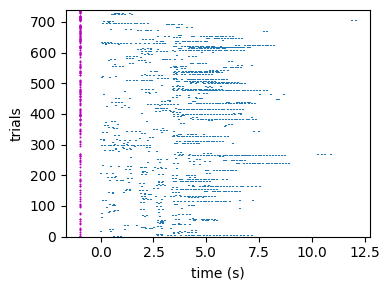

In [51]:
# Lick raster
lick_times = trial_metadata.lick_times.values - trial_metadata.start_time.values

fig, ax = plt.subplots(figsize = (4, 3))
ax.eventplot(lick_times, linelength = 1.5);
go_trials =  trial_metadata[trial_metadata.go].index
ax.plot(-1*np.ones(len(go_trials)), go_trials, marker = '*', ls = 'none', color = 'm', ms = 0.8)
ax.set_ylim(-0.5, len(lick_times))
ax.set_ylabel('trials')
ax.set_xlabel('time (s)')
plt.tight_layout()

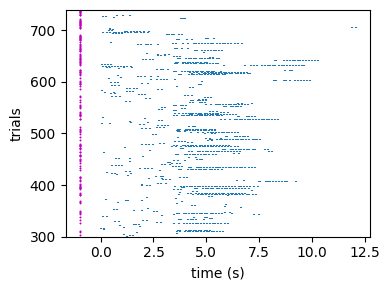

In [52]:
# Lick raster
lick_times = trial_metadata.lick_times.values - trial_metadata.start_time.values

fig, ax = plt.subplots(figsize = (4, 3))
ax.eventplot(lick_times, linelength = 1);
go_trials =  trial_metadata[trial_metadata.go].index
ax.plot(-1*np.ones(len(go_trials)), go_trials, marker = '*', ls = 'none', color = 'm', ms = 0.8)
ax.set_ylim(300, len(lick_times))
ax.set_ylabel('trials')
ax.set_xlabel('time (s)')
plt.tight_layout()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.2:</b> Plot lick rasters for the other example mice. What do their lick trends look like?
</div>

In [9]:
# Blank coding cell to work out the task  

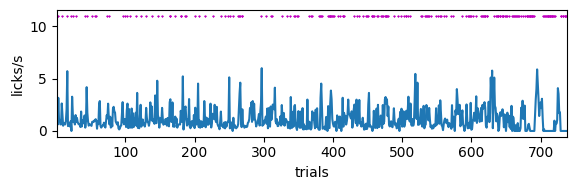

In [53]:
# lick rate 

fig, ax = plt.subplots(figsize = (6, 2))
lick_rate = trial_metadata.apply(lambda row : len(row['lick_times'])/(row['stop_time'] - row['start_time']), axis = 1)
ax.plot(lick_rate)
ax.plot(go_trials,11*np.ones(len(go_trials)), marker = '*', ls = 'none', color = 'm', ms = 1 ) 

ax.set_ylabel('licks/s')
ax.set_xlabel('trials')
ax.set_xlim(go_trials[0], go_trials[-1])
plt.tight_layout()

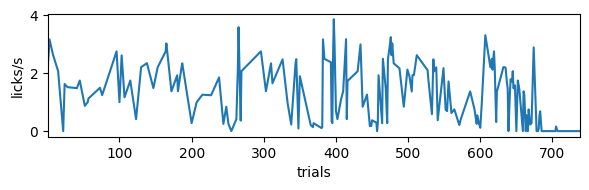

In [54]:
# lick rate during go trials

fig, ax = plt.subplots(figsize = (6, 2))
lick_rate = trial_metadata[trial_metadata.go].apply(lambda row : len(row['lick_times'])/(row['stop_time'] - row['start_time']), axis = 1)
ax.plot(go_trials, lick_rate)

ax.set_ylabel('licks/s')
ax.set_xlabel('trials')
ax.set_xlim(go_trials[0], go_trials[-1])
plt.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Could the mouse be disenaging from the task as they reach the end of the session? Although, lick rate does indicate this, disengaged mice could also perform persistent licking regardless of the task. Therefore, to test our hypothesis, we quantify two metrics:
<p> 1. hit rate: Hit rate is the probabilitY that a mouse would correctly perform a lick during 'go' trials. This is evaluated as the fraction over 10 go-trials in which the mouse licked correctly to the changed image. 
    
<p> 2. d prime: d prime is a measure of the relative difference in response probabilities across the two trial types, hits and false alarms. It is defined as: 
                                                                d' = Z(h) - Z(f)

    
</div>

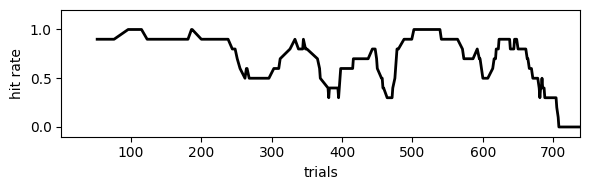

In [55]:
# compute hit rate with 10 trial rolling window
hit_rate = trial_metadata.hit[trial_metadata.go].rolling(10).mean()

# compute d prime
Z = norm.ppf
num_catch_trials = len(np.where(trial_metadata.catch)[0])
num_catch_hit_trials = len(np.where(trial_metadata.hit[trial_metadata.catch])[0])

hr = num_go_hit_trials/num_go_trials
fa = num_catch_hit_trials/num_catch_trials # something wrong, fa = 0 ?! 

d_prime = Z(hr) - Z(fa)

fig,ax = plt.subplots(figsize = (6, 2)) 
ax.plot(go_trials, hit_rate, color = 'k', lw = 2)
# ax.text(500, 1, r"$d^{'}$ = " + str(np.round(d_prime, 2)))
ax.set_xlim(go_trials[0], go_trials[-1])
ax.set_ylim(-0.1, 1.2)
ax.set_xlabel('trials')
ax.set_ylabel('hit rate')

plt.tight_layout()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Does the behavior in the 2P experiments look similar to the Neuropixels dataset?
<p> How does it look different?
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Define a reasonable engagement threshold.
</div>

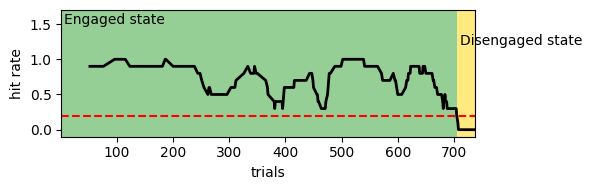

In [56]:
engagement_threshold = 0.2

fig,ax = plt.subplots(figsize = (6, 2)) 
ax.plot(go_trials, hit_rate, color = 'k', lw = 2)
ax.plot(go_trials, 0.2*np.ones(num_go_trials), color = 'r', ls = '--')

states = hit_rate < engagement_threshold
switch_trials = np.where(np.diff(states.values))[0]
switch_trials = np.concatenate(([0], switch_trials, [num_go_trials-1]))
for i, trial in enumerate(switch_trials[:-1]):
    if not states.values[trial+1]: 
        ax.text(go_trials[trial] + 5, 1.5, 'Engaged state', color = 'k', size = 10)
        ax.axvspan(go_trials[trial], go_trials[switch_trials[i+1]], facecolor='tab:green', alpha=0.5)
    else:
        ax.text(go_trials[trial] + 5, 1.2, 'Disengaged state', color = 'k', size = 10)
        ax.axvspan(go_trials[trial], go_trials[switch_trials[i+1]], facecolor='gold', alpha=0.5)
ax.set_ylim(-0.1, 1.7)
ax.set_xlim(go_trials[0], go_trials[-1])
ax.set_xlabel('trials')
ax.set_ylabel('hit rate')
plt.tight_layout()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.3:</b> Evaluate the correlation between hit rate and licking during 'go' trials. 
</div>

In [14]:
# Blank coding cell to work out the task  



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Does the mouse change its behavior as it disengages? Throughout each session, mouse running speed and pupil area were also recorded, as well as earned rewards. 
</div>

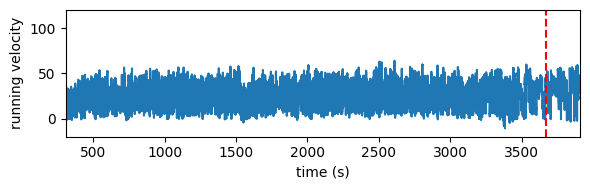

In [57]:
# running speed

running_time = session.running_speed.timestamps
running_speed = session.running_speed.speed
stop_time = trial_metadata.stop_time.max()
start_time = trial_metadata.start_time.min()

fig,ax = plt.subplots(figsize = (6, 2)) 
plt.plot(running_time, running_speed)
ax.set_xlim(start_time, stop_time)

time_at_switch = trial_metadata.iloc[go_trials[np.where(np.diff(states.values))[0]]].start_time.values
        
for i in range(len(time_at_switch)):
    plt.plot(time_at_switch[i]*np.ones(5), np.linspace(-20, 120, 5), color = 'r' , ls = '--')
ax.set_ylim(-20, 120)
ax.set_xlabel('time (s)')
ax.set_ylabel('running velocity')
plt.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> This plot is noisy and it is difficult to point out trial-wise changes in the running speed. We can smooth this plot out and analyse mean running speed in each trial to find any correlates of state transitions in the go trials.  
</div>

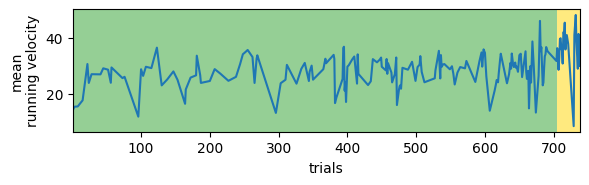

In [58]:
# mean running speed in each trial

trial_start = trial_metadata.start_time[np.where(trial_metadata.go)[0]]
trial_stop = trial_metadata.stop_time[np.where(trial_metadata.go)[0]]

mean_speed = [np.nanmean(running_speed[np.logical_and(s1 <= running_time, running_time <= s2)]) for s1, s2 in zip(trial_start, trial_stop)]

fig,ax = plt.subplots(figsize = (6, 2))
plt.plot(go_trials, mean_speed)

for i, trial in enumerate(switch_trials[:-1]):
    if not states.values[trial+1]: 
        ax.axvspan(go_trials[trial], go_trials[switch_trials[i+1]], facecolor='tab:green', alpha=0.5)
    else:
        ax.axvspan(go_trials[trial], go_trials[switch_trials[i+1]], facecolor='gold', alpha=0.5)

ax.set_xlabel('trials')
ax.set_ylabel('mean\nrunning velocity')
ax.set_xlim(go_trials[0], go_trials[-1])
plt.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> This plot shows that mice run more when they are disengaged. Let us analyze this behavior more closely.  
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Plot up the histograms for the run speed in each state.
</div>

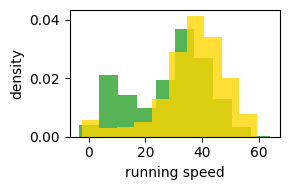

In [59]:
# running speed during go trials at all time stamps 

def flatten(l):
    # function to flatten a list of lists 
    return np.array([item for sublist in l for item in sublist])

engaged_speed = []
disengaged_speed =[]

engaged_time = []
disengaged_time =[]

for index, state in states.items():
    t_start = trial_metadata.iloc[index].start_time
    t_stop = trial_metadata.iloc[index].stop_time
    t = np.where((running_time >= t_start) & (running_time <= t_stop))[0]
    if not state:
        engaged_speed.append(running_speed[t])
        engaged_time.append(running_time[t])
    else:
        disengaged_speed.append(running_speed[t])
        disengaged_time.append(running_time[t])
        
fig,ax = plt.subplots(figsize = (3, 2)) 
plt.hist(flatten(engaged_speed), color = 'tab:green', density = True, alpha = 0.8);
plt.hist(flatten(disengaged_speed), color = 'gold', density = True, alpha = 0.8);
plt.ylabel('density')
plt.xlabel('running speed')
plt.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Mice seem to be stopping a lot more in the engaged state. To see why, we can look at the running speeds during engaged states. 
</div>

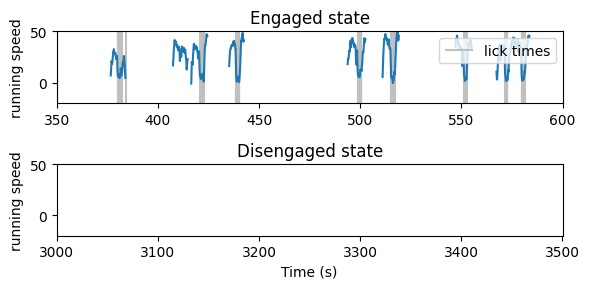

In [60]:
lick_times = trial_metadata[trial_metadata.go].lick_times
engaged_lick_times = lick_times[~states.values]
disengaged_lick_times = lick_times[states.values]

fig, ax = plt.subplots(2, 1, figsize = (6, 3))

ax[0].set_title('Engaged state')
for time, speed in zip(engaged_time, engaged_speed):
    ax[0].plot(time, speed, color = 'tab:blue')
ax[0].vlines(flatten(engaged_lick_times.values), ymax = 120, ymin = -20, color = 'silver', label = 'lick times')
ax[0].set_ylim(-20, 50)
ax[0].set_xlim(350,600)
ax[0].legend(loc = 'upper right')
ax[0].set_ylabel('running speed')

ax[1].set_title('Disengaged state')
for time, speed in zip(disengaged_time, disengaged_speed):
    ax[1].plot(time, speed, color = 'tab:blue')
ax[1].vlines(flatten(disengaged_lick_times.values), ymax = 120, ymin = -20, color = 'silver', label = 'lick times')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylim(-20, 50)
ax[1].set_xlim(3000,3500) # change limits for different mice
ax[1].set_ylabel('running speed')
plt.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> They seem to be doing so in order to lick the spout to recieve the water reward. This act of stopping seems to be externally driven. Is there a more internally driven behavioral metric we can look at? Pupil size/area is commonly used to measure arousal levels of mice. Let us see how this metric varies during the engaged and disengaged states. 
</div>

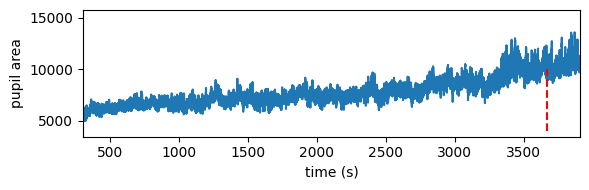

In [61]:
# pupil size

pupil_time = session.eye_tracking.timestamps
pupil_area = session.eye_tracking.pupil_area

fig,ax = plt.subplots(figsize = (6, 2))
plt.plot(pupil_time, pupil_area)
ax.set_xlim(start_time, stop_time)

for i in range(len(time_at_switch)):
    plt.plot(time_at_switch[i]*np.ones(5), np.linspace(4000, 10000, 5), color = 'r' , ls = '--')
#ax.set_ylim(4000, 10000)
ax.set_xlabel('time (s)')
ax.set_ylabel('pupil area')
plt.tight_layout()

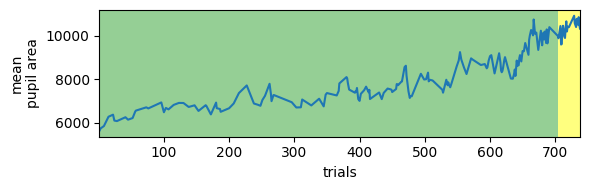

In [62]:
# meanpupil area in each trial

trial_start = trial_metadata.start_time[np.where(trial_metadata.go)[0]]
trial_stop = trial_metadata.stop_time[np.where(trial_metadata.go)[0]]

mean_pupil_area = [np.nanmean(pupil_area[np.logical_and(s1 <= pupil_time, pupil_time <= s2)]) for s1, s2 in zip(trial_start, trial_stop)]

fig,ax = plt.subplots(figsize = (6, 2))
plt.plot(go_trials, mean_pupil_area)

for i, trial in enumerate(switch_trials[:-1]):
    if not states.values[trial+1]: 
        ax.axvspan(go_trials[trial], go_trials[switch_trials[i+1]], facecolor='tab:green', alpha=0.5)
    else:
        ax.axvspan(go_trials[trial], go_trials[switch_trials[i+1]], facecolor='yellow', alpha=0.5)

ax.set_xlabel('trials')
ax.set_ylabel('mean\npupil area')
ax.set_xlim(go_trials[0], go_trials[-1])
plt.tight_layout()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Plot up the stimuli, the running speed, pupil size for a single event to help build inutition about these dynamics. 
<p> accomplish this task by modifying the following starter code
</div>

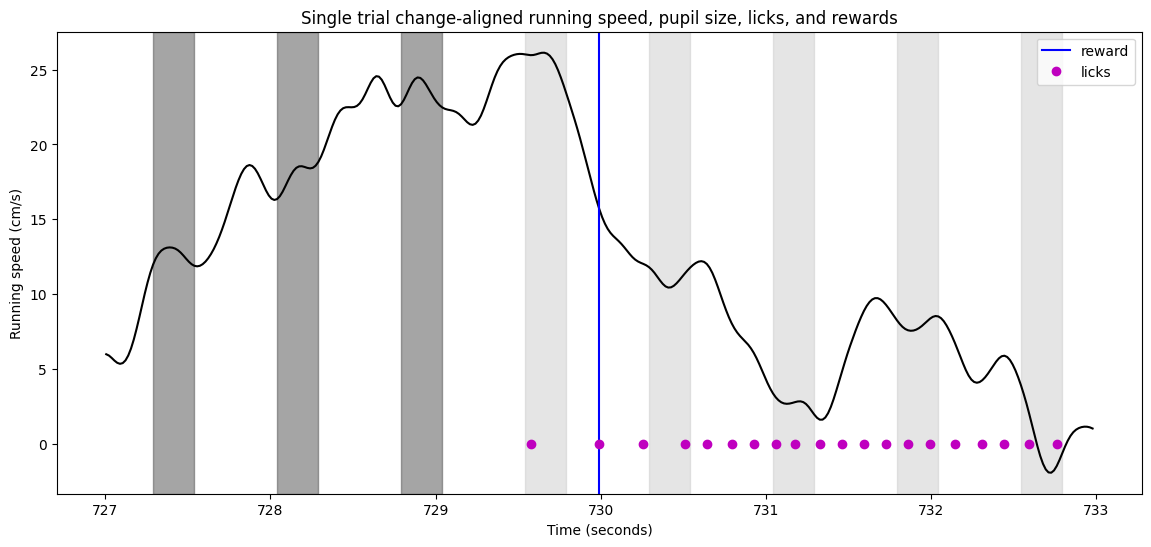

In [63]:
rewards = session.rewards
eye_tracking = session.eye_tracking
running_speed = session.running_speed
licks = session.licks
stimulus_presentations = session.stimulus_presentations
# grab the pupil data corresponding to our window
time_before = 3.0 #how much time to plot before the reward
time_after = 3.0 #how much time to plot after the reward

reward_time = rewards.timestamps.iloc[13]

#Get running data aligned to this reward
trial_running = running_speed[(running_speed['timestamps']>=reward_time-time_before)&
                              (running_speed['timestamps']< reward_time+time_after)]

trial_licking = licks[(licks['timestamps']>=reward_time-time_before)&
                      (licks['timestamps'] < reward_time+time_after)]

#eye_tracking_noblinks = eye_tracking[~eye_tracking['likely_blink']]
#eye_tracking_noblinks[(eye_tracking_noblinks['timestamps']>=reward_time-time_before)&
#                                         (eye_tracking_noblinks['timestamps'] < reward_time+time_after)]

# Plot the running
fig, ax_running = plt.subplots()
fig.set_size_inches(14,6)
ax_running.plot(trial_running['timestamps'], trial_running['speed'], 'k')

# now plot the reward
rew_handle = ax_running.axvline(reward_time, color='b')

# label our axes
ax_running.set_xlabel('Time (seconds)')
ax_running.set_ylabel('Running speed (cm/s)')

#Plot the image flashes as grey bars. 
#Get stimulus presentations around this reward
behavior_presentations = stimulus_presentations
trial_stimuli = behavior_presentations[(behavior_presentations['start_time']>=reward_time-time_before)&
                      (behavior_presentations['start_time'] < reward_time+time_after)]

#Specify different colors for the 2 images shown in this window
colors = ['0.3', '0.8']
stimulus_colors = {stim: c for stim,c in zip(trial_stimuli['image_name'].unique(), colors)}
for idx, stimulus in trial_stimuli.iterrows():
    ax_running.axvspan(stimulus['start_time'], stimulus['end_time'], color=stimulus_colors[stimulus['image_name']], alpha=0.5)
    
ax_running.set_title('Single trial change-aligned running speed, pupil size, licks, and rewards')

# Plot the pupil area on a new axis with the same x-axis as the running data
#ax_pupil = ax_running.twinx()
#ax_pupil.plot(trial_eye_tracking_data['timestamps'], trial_eye_tracking_data['pupil_area'], 'g')
#ax_pupil.set_ylabel('pupil area\n$(pixels^2)$')

# format the pupil axis to match the plot color
#ax_pupil.yaxis.label.set_color('g')
#ax_pupil.spines['right'].set_color('g')
#ax_pupil.tick_params(axis='y', colors='g')

# Plot the licking. Just use the running axis.
lick_handle, = ax_running.plot(trial_licking['timestamps'], np.zeros(len(trial_licking['timestamps'])), 'mo')


#Now add a legend to label the reward and licks
ax_running.legend([rew_handle, lick_handle], ['reward', 'licks'])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Pupil size seems to be gradually increasing as the session ends. Could it be a good predictor of a state transition? 
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> As we have seen until now, the mouse's behavior varies with changes in its internal state. However, we have only observed these states indirectly through a mouse's behavior.
Here, we inferred a state change into an "inattentive/disengaged" state since the mouse stopped licking in response to stimulus changes. 
The internal states we infer from behavior can offer clues for when we should look for changes in the underlying neural activity. Let us see how the neural responses to image changes differ between the two behavioral states we've inferred. 
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> First, we have to access the unit data, pick an area of interest and filter out any bad units using the pre-determined quality control metrics (see Jupyter notebook for details). 
</div>

In [64]:
stims = session.stimulus_presentations
stims.head()

,duration,end_frame,flashes_since_change,image_index,image_name,is_change,omitted,start_frame,start_time,end_time
stimulus_presentations_id,,,,,,,,,,
0,0.25020,18001.0,0.0,0,im000,False,False,17986,306.87992,307.13012
1,0.25020,18046.0,1.0,0,im000,False,False,18031,307.63055,307.88075
2,0.25021,18091.0,2.0,0,im000,False,False,18076,308.38116,308.63137
3,0.25022,18136.0,3.0,0,im000,False,False,18121,309.13177,309.38199
4,0.25020,18181.0,4.0,0,im000,False,False,18166,309.88236,310.13256


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b>Use the session.dff_traces structure to extract the time dynamics of the Ca signal across time. 
</div>

In [65]:
# get traces and timestamps
dff_traces = session.dff_traces
ophys_timestamps = session.ophys_timestamps

cellid = 0
otime = ophys_timestamps
dff = dff_traces.iloc[cellid].dff

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Define the changed stimuli so that we can focus in on the dynamics of single neurons in proximity to this critical time point.
</div>

In [66]:
change_time = stims[stims.is_change == True]
change_time.head()

,duration,end_frame,flashes_since_change,image_index,image_name,is_change,omitted,start_frame,start_time,end_time
stimulus_presentations_id,,,,,,,,,,
6,0.25022,18271.0,0.0,7,im035,True,False,18256,311.38359,311.63381
21,0.25015,18946.0,0.0,0,im000,True,False,18931,322.64281,322.89296
52,0.25020,20341.0,0.0,4,im045,True,False,20326,345.91176,346.16196
97,0.25024,22366.0,0.0,2,im075,True,False,22351,379.68932,379.93956
138,0.25022,24211.0,0.0,3,im073,True,False,24196,410.46436,410.71458


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Register fluroscence readouts to this change time point for a single cell by modifying the below code cell.
</div>

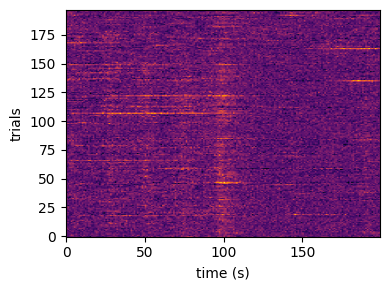

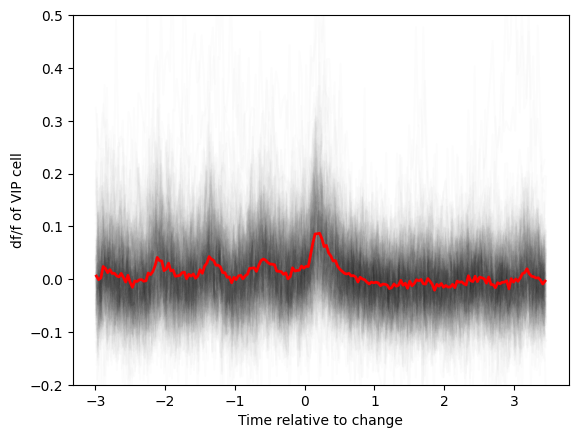

ValueError: fp and xp are not of the same length.

In [67]:
cellid = 6
change_time = stims[stims.is_change == True]
otime = ophys_timestamps
dff = dff_traces.iloc[cellid].dff
windowsize = 200
trial_dff = np.zeros([change_time.start_time.values.shape[0], windowsize])
trial_time = np.zeros([change_time.start_time.values.shape[0], windowsize])
for i, t in enumerate(change_time.start_time.values):
    startpt = np.where(otime>=t-time_before)[0][0]
    trial_dff[i,:] = dff[startpt:startpt+windowsize]
    trial_time[i,:] = otime[startpt:startpt+windowsize] - t

fig, ax = plt.subplots(figsize = (4, 3))
ax.imshow(trial_dff, aspect='auto', cmap='inferno', origin='lower')
ax.set_ylabel('trials')
ax.set_xlabel('time (s)')
plt.tight_layout()
plt.show()

plt.plot(trial_time.T, trial_dff.T, 'k', alpha = 0.01)
plt.plot(trial_time[0,:], np.mean(trial_dff, axis = 0), 'r', lw = 2)
plt.ylim([-0.2,0.5])
plt.ylabel('df/f of VIP cell')
plt.xlabel('Time relative to change')
plt.show()


states_intp = np.interp(change_time.start_time.values, trials[trials.go==True].start_time.values, states)
engaged_dff = trial_dff[states_intp>0]
disengaged_dff = trial_dff[states_intp == 0]
engaged_time = trial_time[states_intp>0]
disengaged_time = trial_time[states_intp == 0]

plt.plot(engaged_time.T, engaged_dff.T, 'tab:green', alpha = 0.01)
plt.plot(disengaged_time.T, disengaged_dff.T, 'gold', alpha = 0.01)
plt.plot(trial_time[0,:], np.mean(engaged_dff, axis = 0), 'tab:green', lw = 2)
plt.plot(trial_time[0,:], np.mean(disengaged_dff, axis = 0), 'gold', lw = 2)
plt.ylim([-0.2,0.5])
plt.ylabel('df/f of VIP cell')
plt.xlabel('Time relative to change')
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Begin exploring the core question of this exercise: do any of the cells have different activations in proximity to the change dependening upon which behavior state the animal is in?
</div>

In [69]:
engaged_dff = trial_dff[~states[go_trials].values]
disengaged_dff = trial_dff[states[go_trials].values]

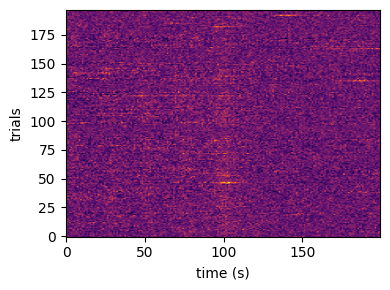

Text(0.5, 0, 'Time relative to change')

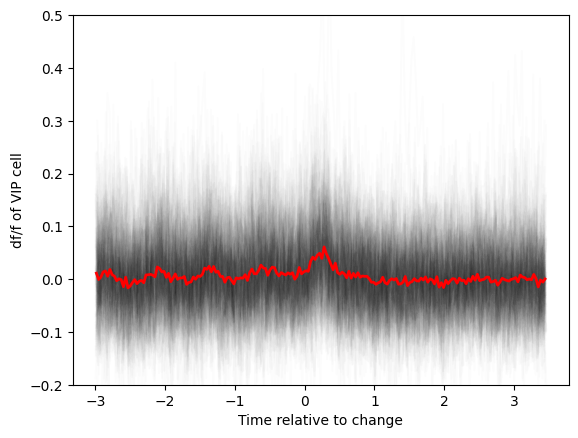

In [70]:
cellid = 0
change_time = stims[stims.is_change == True]
otime = ophys_timestamps
dff = dff_traces.iloc[cellid].dff
windowsize = 200
trial_dff = np.zeros([change_time.start_time.values.shape[0], windowsize])
trial_time = np.zeros([change_time.start_time.values.shape[0], windowsize])
for i, t in enumerate(change_time.start_time.values):
    startpt = np.where(otime>=t-time_before)[0][0]
    trial_dff[i,:] = dff[startpt:startpt+windowsize]
    trial_time[i,:] = otime[startpt:startpt+windowsize] - t

fig, ax = plt.subplots(figsize = (4, 3))
ax.imshow(trial_dff, aspect='auto', cmap='inferno', origin='lower')
ax.set_ylabel('trials')
ax.set_xlabel('time (s)')
plt.tight_layout()
plt.show()

plt.plot(trial_time.T, trial_dff.T, 'k', alpha = 0.01)
plt.plot(trial_time[0,:], np.mean(trial_dff, axis = 0), 'r', lw = 2)
plt.ylim([-0.2,0.5])
plt.ylabel('df/f of VIP cell')
plt.xlabel('Time relative to change')

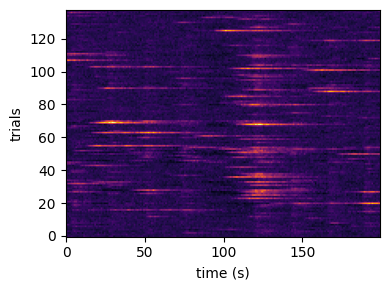

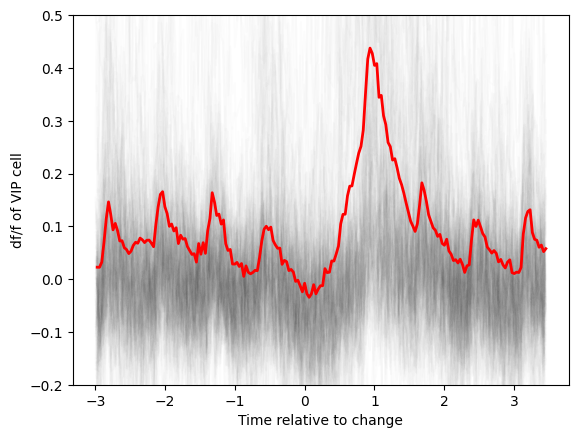

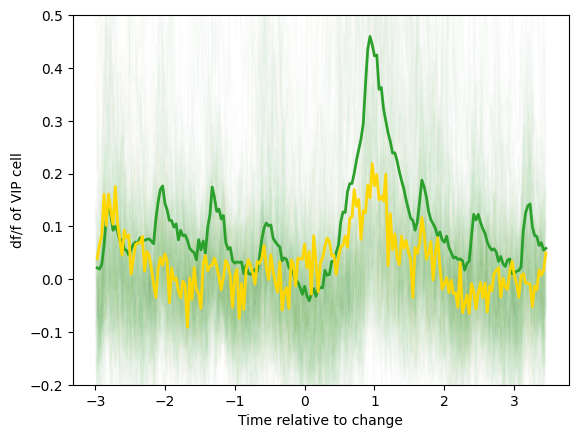

In [78]:
cellid = 2
change_time = stims[stims.omitted == True]
otime = ophys_timestamps
dff = dff_traces.iloc[cellid].dff
windowsize = 200
trial_dff = np.zeros([change_time.start_time.values.shape[0], windowsize])
trial_time = np.zeros([change_time.start_time.values.shape[0], windowsize])
for i, t in enumerate(change_time.start_time.values):
    startpt = np.where(otime>=t-time_before)[0][0]
    trial_dff[i,:] = dff[startpt:startpt+windowsize]
    trial_time[i,:] = otime[startpt:startpt+windowsize] - t

fig, ax = plt.subplots(figsize = (4, 3))
ax.imshow(trial_dff, aspect='auto', cmap='inferno', origin='lower')
ax.set_ylabel('trials')
ax.set_xlabel('time (s)')
plt.tight_layout()
plt.show()

plt.plot(trial_time.T, trial_dff.T, 'k', alpha = 0.01)
plt.plot(trial_time[0,:], np.mean(trial_dff, axis = 0), 'r', lw = 2)
plt.ylim([-0.2,0.5])
plt.ylabel('df/f of VIP cell')
plt.xlabel('Time relative to change')
plt.show()

states_intp = np.interp(change_time.start_time.values, trials[trials.go==True].start_time.values, states)
engaged_dff = trial_dff[states_intp == 0]
disengaged_dff = trial_dff[states_intp > 0]
engaged_time = trial_time[states_intp == 0]
disengaged_time = trial_time[states_intp > 0]

plt.plot(engaged_time.T, engaged_dff.T, 'tab:green', alpha = 0.01)
plt.plot(disengaged_time.T, disengaged_dff.T, 'gold', alpha = 0.01)
plt.plot(trial_time[0,:], np.mean(engaged_dff, axis = 0), 'tab:green', lw = 2)
plt.plot(trial_time[0,:], np.mean(disengaged_dff, axis = 0), 'gold', lw = 2)
plt.ylim([-0.2,0.5])
plt.ylabel('df/f of VIP cell')
plt.xlabel('Time relative to Omission')
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Look for differences between behavior states in other cells!
</div>

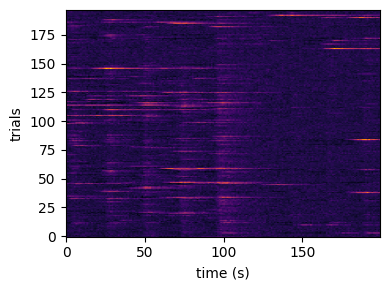

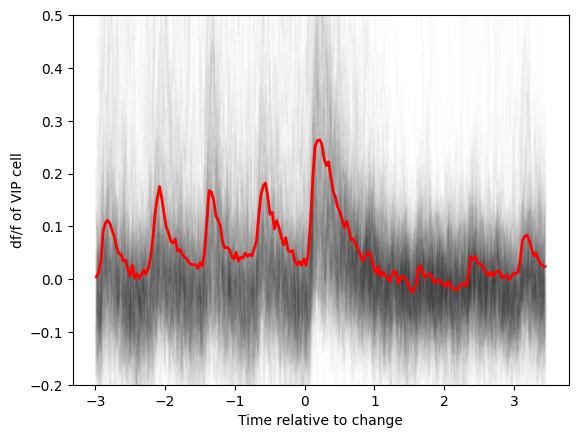

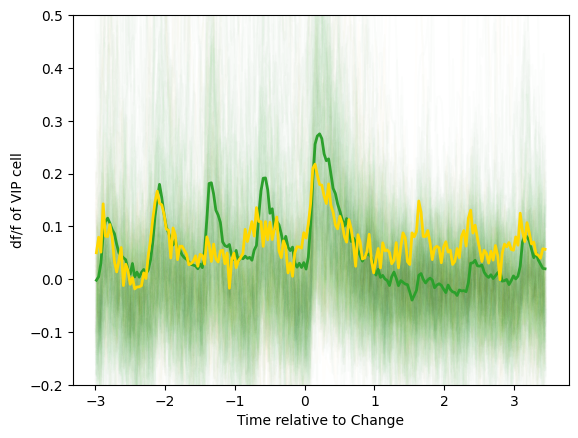

In [79]:
cellid = 2
change_time = stims[stims.is_change == True]
otime = ophys_timestamps
dff = dff_traces.iloc[cellid].dff
windowsize = 200
trial_dff = np.zeros([change_time.start_time.values.shape[0], windowsize])
trial_time = np.zeros([change_time.start_time.values.shape[0], windowsize])
for i, t in enumerate(change_time.start_time.values):
    startpt = np.where(otime>=t-time_before)[0][0]
    trial_dff[i,:] = dff[startpt:startpt+windowsize]
    trial_time[i,:] = otime[startpt:startpt+windowsize] - t

fig, ax = plt.subplots(figsize = (4, 3))
ax.imshow(trial_dff, aspect='auto', cmap='inferno', origin='lower')
ax.set_ylabel('trials')
ax.set_xlabel('time (s)')
plt.tight_layout()
plt.show()

plt.plot(trial_time.T, trial_dff.T, 'k', alpha = 0.01)
plt.plot(trial_time[0,:], np.mean(trial_dff, axis = 0), 'r', lw = 2)
plt.ylim([-0.2,0.5])
plt.ylabel('df/f of VIP cell')
plt.xlabel('Time relative to change')
plt.show()

states_intp = np.interp(change_time.start_time.values, trials[trials.go==True].start_time.values, states)
engaged_dff = trial_dff[states_intp == 0]
disengaged_dff = trial_dff[states_intp > 0]
engaged_time = trial_time[states_intp == 0]
disengaged_time = trial_time[states_intp > 0]

plt.plot(engaged_time.T, engaged_dff.T, 'tab:green', alpha = 0.01)
plt.plot(disengaged_time.T, disengaged_dff.T, 'gold', alpha = 0.01)
plt.plot(trial_time[0,:], np.mean(engaged_dff, axis = 0), 'tab:green', lw = 2)
plt.plot(trial_time[0,:], np.mean(disengaged_dff, axis = 0), 'gold', lw = 2)
plt.ylim([-0.2,0.5])
plt.ylabel('df/f of VIP cell')
plt.xlabel('Time relative to Change')
plt.show()

In [79]:
dff[otime>=change_time['start_time'].values-time_before]

ValueError: operands could not be broadcast together with shapes (140084,) (214,) 

In [19]:
# what does the dff_traces attribute look like? 
dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1120064212,1115313972,"[1.1222695989589277, 1.6483813230628925, -0.23..."
1120064282,1115313975,"[0.10167466424998062, 0.5391954220364107, 0.09..."
1120064430,1115313977,"[0.08313615605276264, 1.2175512653892189, 0.01..."
1120064937,1115313980,"[3.002081216005998, 2.5503023295281664, 1.8349..."
1120064608,1115313981,"[0.1999205201769187, 0.034267285591811025, 0.0..."


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Can we begin identifying features of cells that predict whether it is sensitive to behavior state or not?
</div>

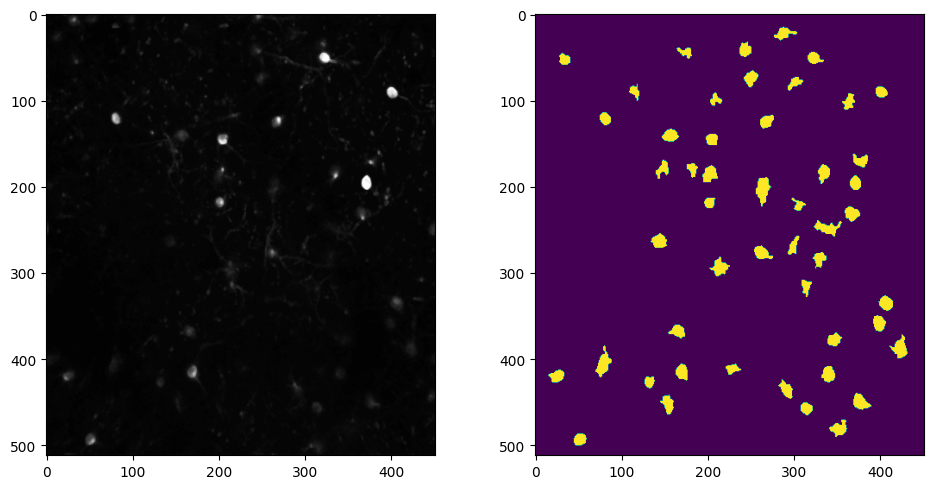

In [73]:
# plot the max intensity projection and the segmentation mask
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

ax[0].imshow(session.max_projection, cmap='gray')
ax[1].imshow(session.segmentation_mask_image)
plt.tight_layout()

<ipython-input-74-af27ea60aeef>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0, ophys_timestamps[-1], 300));


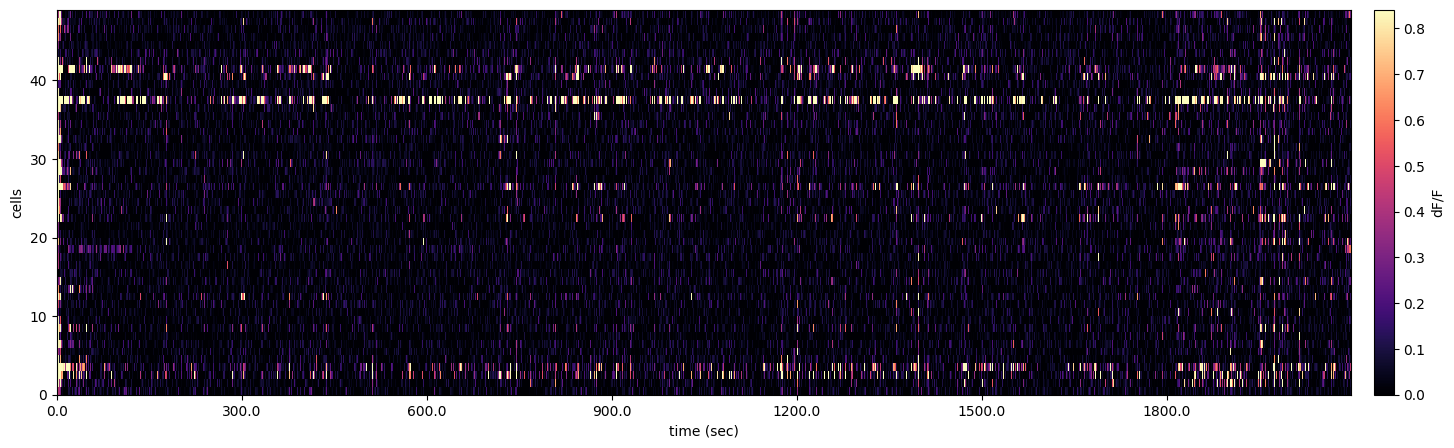

In [74]:
# plot heatmap of all cell traces in this experiment
dff_traces_array = np.vstack(dff_traces["dff"].values)
fig, ax = plt.subplots(figsize = (20,5))

cax = ax.pcolormesh(dff_traces_array,
                    vmin = 0, vmax = np.percentile(dff_traces_array, 99),
                    cmap = 'magma')

# label axes 
ax.set_ylabel('cells')
ax.set_xlabel('time (sec)')

# x ticks
ax.set_yticks(np.arange(0, len(dff_traces_array), 10));
ax.set_xticklabels(np.arange(0, ophys_timestamps[-1], 300));

# creating a color bar
cb = plt.colorbar(cax, pad=0.015, label='dF/F')

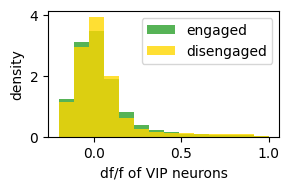

In [77]:
#dff_mean = np.mean(np.vstack(dff_traces["dff"].values), axis=0)
dff_mean = dff_traces_array[2,:]

engaged_dff = []
disengaged_dff =[]

engaged_time = []
disengaged_time =[]

for index, state in states.items():
    t_start = trial_metadata.iloc[index].start_time
    t_stop = trial_metadata.iloc[index].stop_time
    t = np.where((ophys_timestamps >= t_start) & (ophys_timestamps <= t_stop))[0]
    if not state:
        engaged_dff.append(dff_mean[t])
        engaged_time.append(ophys_timestamps[t])
    else:
        disengaged_dff.append(dff_mean[t])
        disengaged_time.append(ophys_timestamps[t])
        
fig,ax = plt.subplots(figsize = (3, 2)) 
plt.hist(flatten(engaged_dff), color = 'tab:green', density = True, alpha = 0.8, bins=np.linspace(-0.2, 1, 15), label = 'engaged');
plt.hist(flatten(disengaged_dff), color = 'gold', density = True, alpha = 0.8, bins=np.linspace(-0.2, 1, 15), label = 'disengaged');
plt.ylabel('density')
plt.xlabel('df/f of VIP neurons')
plt.legend(loc='best')
plt.tight_layout()

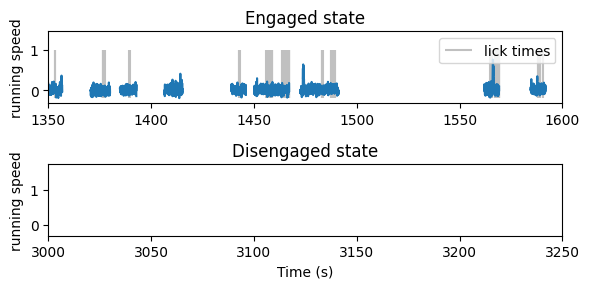

In [76]:
lick_times = trial_metadata[trial_metadata.go].lick_times
engaged_lick_times = lick_times[~states.values]
disengaged_lick_times = lick_times[states.values]

fig, ax = plt.subplots(2, 1, figsize = (6, 3))

ax[0].set_title('Engaged state')
for time, speed in zip(engaged_time, engaged_dff):
    ax[0].plot(time, speed, color = 'tab:blue')
ax[0].vlines(flatten(engaged_lick_times.values), ymax = 1, ymin = -0.2, color = 'silver', label = 'lick times')
#ax[0].set_ylim(-20, 50)
ax[0].set_xlim(1350,1600)
ax[0].legend(loc = 'upper right')
ax[0].set_ylabel('running speed')

ax[1].set_title('Disengaged state')
for time, speed in zip(disengaged_time, disengaged_dff):
    ax[1].plot(time, speed, color = 'tab:blue')
ax[1].vlines(flatten(disengaged_lick_times.values), ymax = 1, ymin = -.20, color = 'silver', label = 'lick times')
ax[1].set_xlabel('Time (s)')
#ax[1].set_ylim(-20, 50)
ax[1].set_xlim(3000,3250) # change limits for different mice
ax[1].set_ylabel('running speed')
plt.tight_layout()

In [46]:
start = 0 
end = 3600
numpts = 500

running_speed_intp = np.interp(np.linspace(start,end,numpts),running_time,running_speed)
dff_mean_intp = np.interp(np.linspace(start,end,numpts),ophys_timestamps, dff_mean)
state_intp = np.interp(np.linspace(start,end,numpts),running_time, states.values)

plt.scatter(dff_mean_intp, running_speed_intp)
plt.xlabel('VIP mean df/f')
plt.ylabel('Running speed')
plt.show()

ValueError: fp and xp are not of the same length.